In [137]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np

In [138]:
data_dir='/Users/amarnathh/Documents/my_project/animals'

In [139]:
image_exts=['jpeg','jpg','bmp','png']
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [140]:
os.listdir(os.path.join(data_dir,'dog'))

['boerboel-6679ac8b90c9c.jpg',
 'pretty-blonde-with-her-beloved-dog-spending-time-together-ou.jpg',
 'anatolian-shepherd-6679abd70240f.jpg',
 'dalmatian.jpg',
 'gettyimages-917452888-edit_custom-81f4b2e17701ffaab6a0c1e072.jpg',
 'NationalGeographic_748483.jpg',
 '252374-004-4EFDE7CC.jpg',
 'small-fluffy-dog-breeds-american-eskimo-663004d0ec903.jpg',
 'small-fluffy-dog-breeds-mini-goldendoodle-662ffd6b3ed98.jpg',
 'girl-her-dog-11675908.jpg',
 '360_F_621068551_zJvjcjGF8h0SkS1CjO5zQRzqg4Q3VnOR.jpg',
 'charming-watercolor-illustration-captures-cute-dog-bright-co (3).jpg',
 'poodle.jpg',
 'beautiful-happy-reddish-havanese-puppy-dog-sitting-frontal-l.jpg',
 'small-fluffy-dog-breeds-pekingese-1622651917.jpg',
 'cavalier-king-charles-spaniel-dog-hat-vector-illustration_10.jpg',
 'puppy-1207816_640.jpg',
 'ReDGsy6yk6F7H3urxEpQkL-320-80.jpg',
 'golden-retriever-dog-sitting-isolated-white-24750809.jpg',
 'golden-retriever-dog-with-pink-tongue_671352-6943.jpg',
 'best-guard-dog-breeds-bergamasco-

In [141]:
img=cv2.imread(os.path.join(data_dir,'horse','133px-Policja_konna_Poznań.jpg'))
img

array([[[ 43,  89,  96],
        [ 29,  67,  72],
        [ 96, 117, 125],
        ...,
        [162, 152, 135],
        [172, 162, 145],
        [148, 138, 121]],

       [[133, 170, 178],
        [125, 156, 165],
        [ 82, 103, 111],
        ...,
        [170, 160, 143],
        [168, 160, 143],
        [147, 139, 122]],

       [[ 51,  70,  83],
        [ 26,  46,  57],
        [ 78,  99, 107],
        ...,
        [177, 169, 152],
        [163, 156, 139],
        [147, 140, 123]],

       ...,

       [[176, 158, 141],
        [175, 157, 140],
        [173, 155, 138],
        ...,
        [191, 170, 148],
        [190, 169, 147],
        [189, 168, 147]],

       [[177, 159, 142],
        [177, 159, 142],
        [176, 158, 141],
        ...,
        [191, 170, 149],
        [191, 170, 149],
        [192, 170, 152]],

       [[179, 161, 144],
        [180, 162, 145],
        [181, 163, 146],
        ...,
        [193, 172, 151],
        [195, 174, 153],
        [197, 175, 157]]

In [142]:
img.shape

(168, 133, 3)

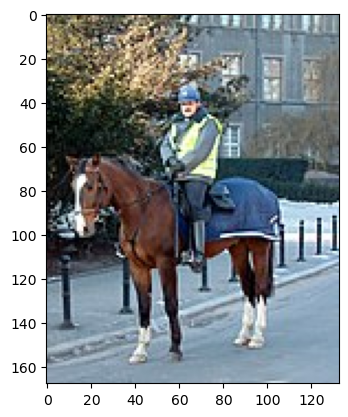

In [143]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [144]:
for image_class in os.listdir(data_dir):
    if not os.path.isdir(os.path.join(data_dir,image_class)):
        continue
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)
        if image == '.DS_Store' or '.ipynb_checkpoints/animals-checkpoint.ipynb':
            continue
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list{}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('issue with image{}'.format(image_path))

In [145]:
data=tf.keras.utils.image_dataset_from_directory(data_dir)

Found 959 files belonging to 4 classes.


In [146]:
data_iterator=data.as_numpy_iterator()

In [147]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x30ad8bd50>)

In [148]:
batch=data_iterator.next()

In [149]:
len(batch)

2

In [150]:
batch[0].shape

(32, 256, 256, 3)

In [129]:
batch[1]
#class 0 = cat
#class 1= Dog
#class 2=horse

array([0, 2, 1, 1, 1, 2, 1, 2, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2, 1, 1, 1, 2,
       2, 2, 2, 0, 0, 0, 2, 1, 0, 2], dtype=int32)

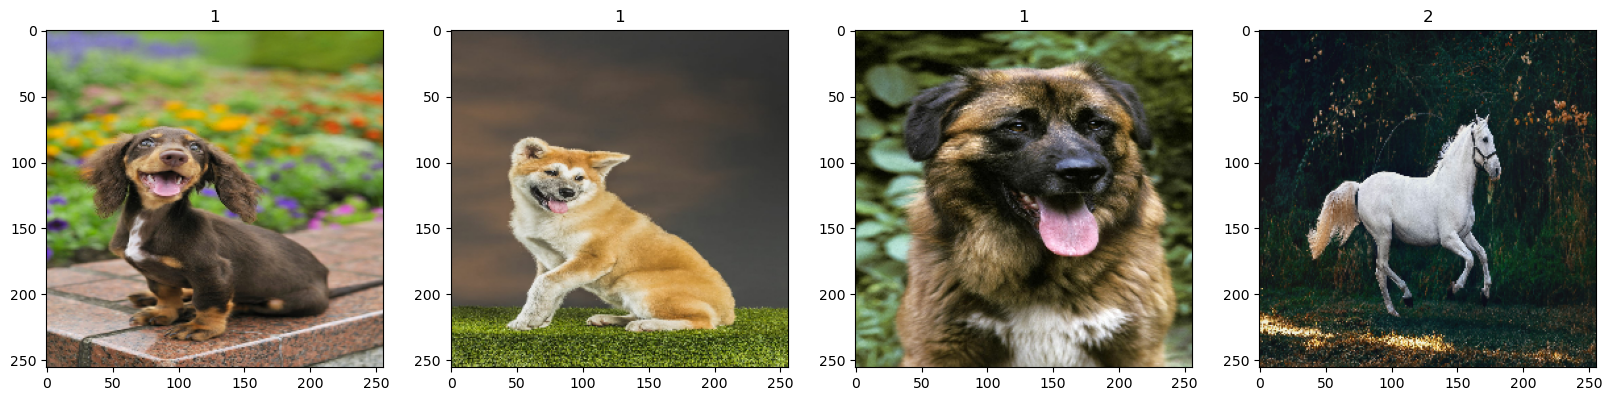

In [151]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [152]:
scaled=batch[0]/255

In [153]:
scaled.min(),scaled.max()

(0.0, 1.0)

In [154]:
data=data.map(lambda x,y:(x/255,y))

In [155]:
scaled_iterator=data.as_numpy_iterator()

In [156]:
batch=scaled_iterator.next()

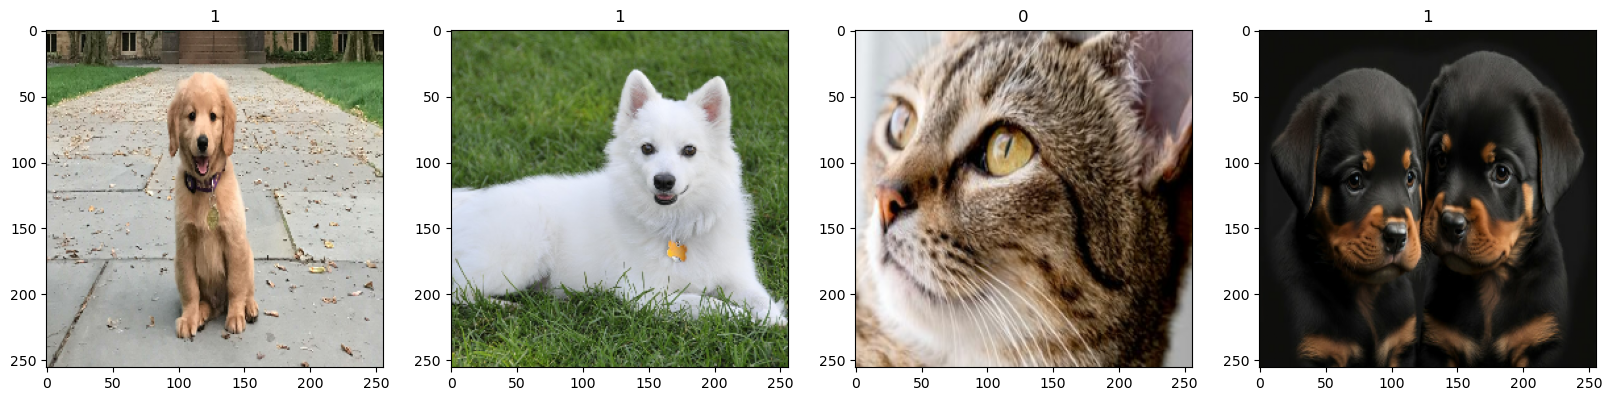

In [157]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [158]:
len(data)

30

In [159]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)

In [160]:
train_size,test_size,val_size

(21, 3, 6)

In [161]:
train_size+test_size+val_size

30

In [87]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [162]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [163]:
model=Sequential()

In [164]:
model.add(Conv2D(16, (3, 3), strides=1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [165]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [166]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [167]:
logdir='/Users/amarnathh/Downloads/images/logs'

In [168]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [169]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 302ms/step - accuracy: 0.5492 - loss: 0.9151 - val_accuracy: 0.5547 - val_loss: 0.6675
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 290ms/step - accuracy: 0.6515 - loss: 0.6279 - val_accuracy: 0.6484 - val_loss: 0.5923
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 305ms/step - accuracy: 0.7888 - loss: 0.4989 - val_accuracy: 0.7656 - val_loss: 0.5125
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 296ms/step - accuracy: 0.7471 - loss: 0.5029 - val_accuracy: 0.7578 - val_loss: 0.5696
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 287ms/step - accuracy: 0.8163 - loss: 0.4324 - val_accuracy: 0.7969 - val_loss: 0.4424
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 293ms/step - accuracy: 0.8661 - loss: 0.3614 - val_accuracy: 0.8750 - val_loss: 0.3006
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 298ms/step - accuracy: 0.9205 - loss: 0.2485 - val_accuracy: 0.8906 - val_loss: 0.2237
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 293ms/step - accuracy: 0.9317 - loss: 0.1798 - val_accuracy: 0.

In [170]:
hist.history

{'accuracy': [0.5848214030265808,
  0.6540178656578064,
  0.7633928656578064,
  0.7366071343421936,
  0.828125,
  0.8526785969734192,
  0.9151785969734192,
  0.9375,
  0.9375,
  0.9151785969734192,
  0.9464285969734192,
  0.953125,
  0.9799107313156128,
  0.9799107313156128,
  0.9888392686843872,
  0.9888392686843872,
  0.984375,
  0.9955357313156128,
  0.9910714030265808,
  0.9955357313156128],
 'loss': [0.8285471200942993,
  0.6224234700202942,
  0.5345247387886047,
  0.5249276161193848,
  0.41112595796585083,
  0.3608808219432831,
  0.2500484585762024,
  0.1736278235912323,
  0.16153724491596222,
  0.21495535969734192,
  0.17484794557094574,
  0.12024571746587753,
  0.08917903155088425,
  0.0652359277009964,
  0.045195795595645905,
  0.04858296364545822,
  0.044502466917037964,
  0.024087343364953995,
  0.024407943710684776,
  0.017616117373108864],
 'val_accuracy': [0.5546875,
  0.6484375,
  0.765625,
  0.7578125,
  0.796875,
  0.875,
  0.890625,
  0.9296875,
  0.8671875,
  0.92968

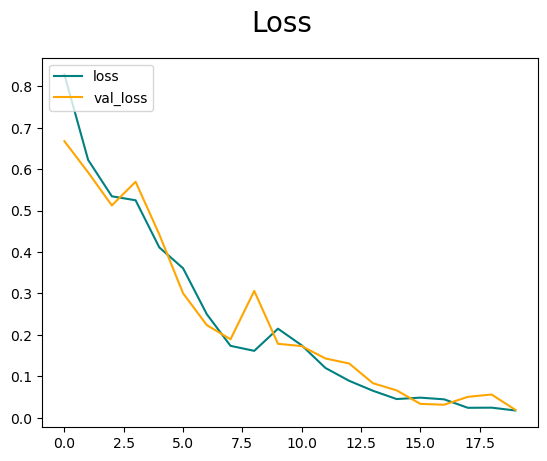

In [171]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

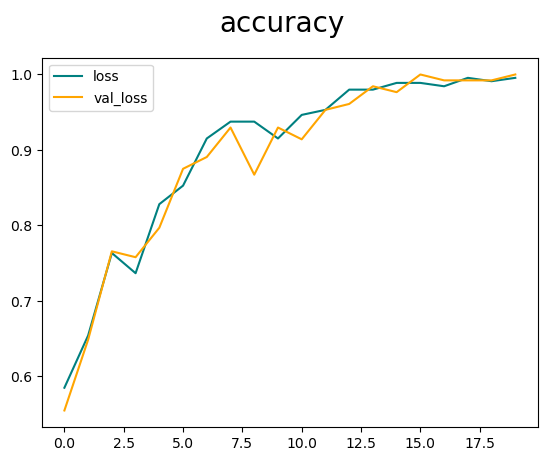

In [172]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='loss')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_loss')
fig.suptitle('accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [173]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [174]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [175]:
for batch in test.as_numpy_iterator():
    X,y=batch
    yhat=model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


2024-06-27 16:34:54.476416: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [176]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision:1.0,Recall:1.0,Accuracy:1.0


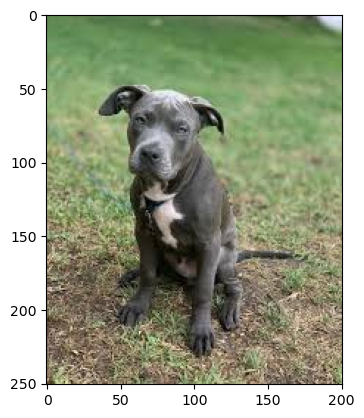

In [204]:
import cv2
img=cv2.imread('/Users/amarnathh/Downloads/dog1.jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

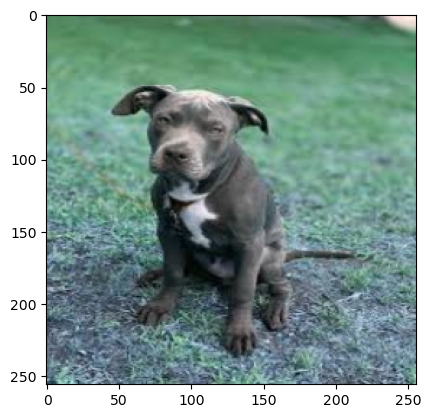

In [205]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [209]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [210]:
yhat

array([[0.01000518]], dtype=float32)

In [203]:
if yhat<.4:
    print(f'Predicted class is cat')
elif yhat >.4 and yhat<.91:
    print(f'Predicted calss is dog')
else:
    print(f'Predicted calss is horse')

Predicted class is cat
